# The safety of the Chicago streets

## Introduction
Crime is an escalating problem for the city of Chicago. The amount of violent crime incidents has surged by 11% and the amount of arrests has dropped compared to the previous year (Illinois Policy, 2024). This alarming trend has resulted in the highest amount of crime since the start of the new decade. Understanding the impact of crime extends beyond just recognizing its immediate effects on victims. It also affects various aspects of urban life to a certain extent. We want to know how far that certain extent goes and to make that analysis we thought of 2 perspectives.
	Perspective 1: Chicago is known for the extreme amount of crime that occurs there, which directly correlates to the amount of traffic accidents that happen there. Therefore the amount of crimes need to be reduced so that the citizens of Chicago can live peaceful lives.
	Perspective 2: The amount of Crime that occurs in Chicago is extreme but it has no direct correlation to the amount of traffic accidents that happen there. It is therefore not necessary to address the amount of crime immediately since no citizens are in harm's way.

We will analyze data from the Chicago Police Department's CLEAR database which contains the crime data and the same police department also released their data of traffic accidents.
With this project we want to shed some light on the factors at play and create a realistic picture of what is happening.




In [2]:
#import libraries
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import plotly.graph_objs as go
from scipy.stats import pearsonr

#import data
crime_data = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')

crash_data = pd.read_csv('Traffic_Crashes_Crashes.csv')
crime_data.head()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
def get_variable_types(crime_data):
    # Get the data types of all variables
    variable_types = crime_data.dtypes

    return variable_types

get_variable_types(crime_data)

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [ ]:
def calculate_mean_coordinates(crash_data):
    # Calculate the mean longitude and latitude
    mean_longitude = crash_data['LONGITUDE'].mean()
    mean_latitude = crash_data['LATITUDE'].mean()

    return {
        'mean_longitude': mean_longitude,
        'mean_latitude': mean_latitude
    }

calculate_mean_coordinates(crash_data)

{'mean_longitude': -87.67344979708152, 'mean_latitude': 41.85478830657295}

In [ ]:
def show_head_hit_and_run(crash_data, n=5):
    # Return the first n rows of the 'HIT_AND_RUN_I' column
    return crash_data['HIT_AND_RUN_I'].head(n)

show_head_hit_and_run(crash_data)

2       Y
18      Y
19      Y
27    NaN
28    NaN
Name: HIT_AND_RUN_I, dtype: object

In [ ]:
def analyze_hit_and_run(crash_data):
    # Count the number of True and False values
    count_true = crash_data[crash_data['HIT_AND_RUN_I'] == 'Y'].shape[0]

    # Calculate the percentages
    total_count = crash_data.shape[0]
    percent_true = (count_true / total_count) * 100

    return {
        'count_true': count_true,
        'percent_true': percent_true
    }

analyze_hit_and_run(crash_data)

{'count_true': 236923, 'percent_true': 30.00669987474147}

In [ ]:
def count_daylight(crash_data):
    # Count the number of 'DAYLIGHT' instances
    count_daylight = crash_data[crash_data['LIGHTING_CONDITION'] == 'DAYLIGHT'].shape[0]

    # Calculate the percentage
    total_count = crash_data.shape[0]
    percent_daylight = (count_daylight / total_count) * 100

    return {
        'count_daylight': count_daylight,
        'percent_daylight': percent_daylight
    }

count_daylight(crash_data)

{'count_daylight': 506621, 'percent_daylight': 64.16440910017769}

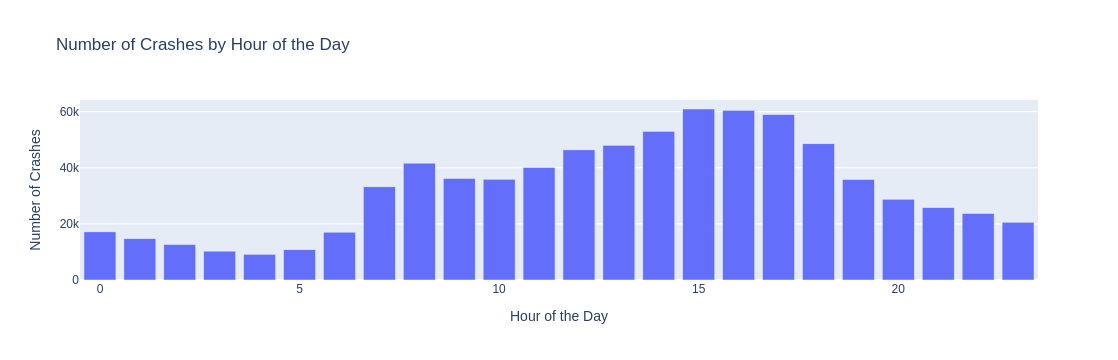

In [ ]:
# Extract hour from 'CRASH_DATE'
crash_data.dropna(subset=['CRASH_DATE'], inplace=True)
crash_data['HOUR'] = crash_data['CRASH_DATE'].dt.hour
crash_data['MONTH'] = crash_data['CRASH_DATE'].dt.month

# Count the number of crashes per hour
crash_counts_per_hour = crash_data['HOUR'].value_counts().sort_index()
crash_counts_per_month = crash_data['MONTH'].value_counts().sort_index()


# Create a bar plot for crashes by hour
fig_hour = px.bar(x=crash_counts_per_hour.index, y=crash_counts_per_hour.values, labels={'x': 'Hour of the Day', 'y': 'Number of Crashes'}, title='Number of Crashes by Hour of the Day')

fig_hour.show()
fig_month = px.bar(x=crash_counts_per_month.index, y=crash_counts_per_month.values, 
                   labels={'x': 'Month', 'y': 'Number of Crashes'}, 
                   title='Number of Crashes by Month')

fig_month.show()

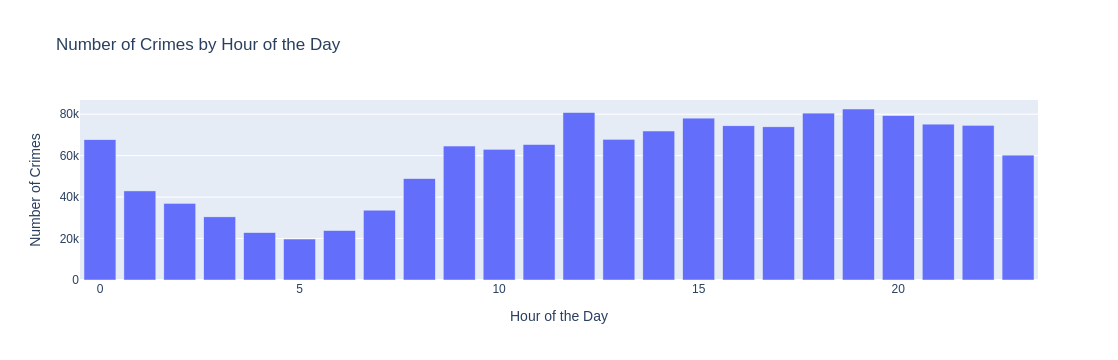

In [ ]:
# Assuming crime_data is already loaded and contains a 'Date' column with dates in the format "mm/dd/yyyy hh:mm:ss AM/PM"

# Convert 'Date' to datetime with explicit format
crime_data['Date'] = pd.to_datetime(crime_data['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract hour from 'Date'
crime_data['HOUR'] = crime_data['Date'].dt.hour

# Count the number of crimes per hour
crime_counts_per_hour = crime_data['HOUR'].value_counts().sort_index()

# Create a bar plot for crimes by hour
fig_crime_hour = px.bar(x=crime_counts_per_hour.index, y=crime_counts_per_hour.values, labels={'x': 'Hour of the Day', 'y': 'Number of Crimes'}, title='Number of Crimes by Hour of the Day')

fig_crime_hour.show()

crime_data['MONTH'] = crime_data['Date'].dt.month

# Count the number of crimes per month
crime_counts_per_month = crime_data['MONTH'].value_counts().sort_index()

# Create a bar plot for crimes by month
fig_crime_month = px.bar(x=crime_counts_per_month.index, y=crime_counts_per_month.values, 
                         labels={'x': 'Month', 'y': 'Number of Crimes'}, 
                         title='Number of Crimes by Month')

fig_crime_month.show()

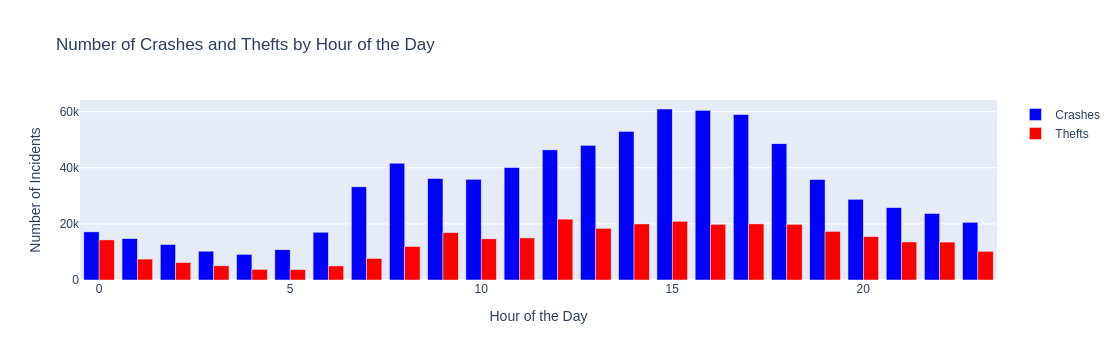

In [ ]:
# Filter crime_data for rows where 'Primary Type' is 'THEFT'
theft_data = crime_data[crime_data['Primary Type'] == 'THEFT']

# Count the number of thefts per hour
theft_counts_per_hour = theft_data['HOUR'].value_counts().sort_index()

# Assuming crash_counts_per_hour is already calculated

# Create traces for the plot
trace_crashes = go.Bar(x=crash_counts_per_hour.index, y=crash_counts_per_hour.values, name='Crashes', marker_color='blue')
trace_thefts = go.Bar(x=theft_counts_per_hour.index, y=theft_counts_per_hour.values, name='Thefts', marker_color='red')

# Create a figure and add traces
fig = go.Figure(data=[trace_crashes, trace_thefts])

# Update layout for a clear visualization
fig.update_layout(barmode='group', title='Number of Crashes and Thefts by Hour of the Day', xaxis_title='Hour of the Day', yaxis_title='Number of Incidents')

fig.show()


In [ ]:
total_thefts = theft_counts_per_hour.sum()
total_crashes = crash_counts_per_hour.sum()

# Calculate the percentage of thefts and crashes per hour
theft_percentage_per_hour = (theft_counts_per_hour / total_thefts) * 100
crash_percentage_per_hour = (crash_counts_per_hour / total_crashes) * 100

aligned_crashes = theft_percentage_per_hour
aligned_thefts = crash_percentage_per_hour

# Create traces for the plot
trace_crashes_percentage = go.Bar(x=crash_percentage_per_hour.index, y=crash_percentage_per_hour.values, name='Crashes Percentage', marker_color='blue')
trace_thefts_percentage = go.Bar(x=theft_percentage_per_hour.index, y=theft_percentage_per_hour.values, name='Thefts Percentage', marker_color='red')

correlation_data = pd.DataFrame({
    'Crashes': aligned_crashes,
    'Thefts': aligned_thefts
})

# Calculate the Pearson correlation coefficient
correlation = correlation_data.corr().loc['Crashes', 'Thefts']
# Create a figure and add traces
fig_percentage = go.Figure(data=[trace_crashes_percentage, trace_thefts_percentage])

# Update layout for a clear visualization
fig_percentage.update_layout(barmode='group', title='Percentage of Daily Total Crashes and Thefts by Hour of the Day', xaxis_title='Hour of the Day', yaxis_title='Percentage of Daily Total')

fig_percentage.add_annotation(
    x=0.5, 
    y=1.1, 
    xref='paper', 
    yref='paper', 
    text=f'Pearson correlation coefficient: {correlation:.2f}', 
    showarrow=False, 
    font=dict(size=14)
)

fig_percentage.show()

In [ ]:
import pandas as pd
import plotly.express as px
import requests

# Sample data and processing (already defined in your code)
# Assuming df_combined is already defined as per your provided code snippet

# URL to Chicago districts GeoJSON
geojson_url = 'https://raw.githubusercontent.com/blackmad/neighborhoods/master/chicago.geojson'

# Load GeoJSON data
response = requests.get(geojson_url)
geojson_data = response.json()

# Plot the data
fig = px.scatter_mapbox(df_combined, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Category",
                        color_discrete_map=color_scale,
                        zoom=10, 
                        height=800,
                        width=800)

# Add GeoJSON layer for Chicago districts
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(
    mapbox={
        'layers': [
            {
                'source': geojson_data,
                'type': "line",
                'color': "black",
                'opacity': 0.5
            }
        ]
    }
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display the map
fig.show()

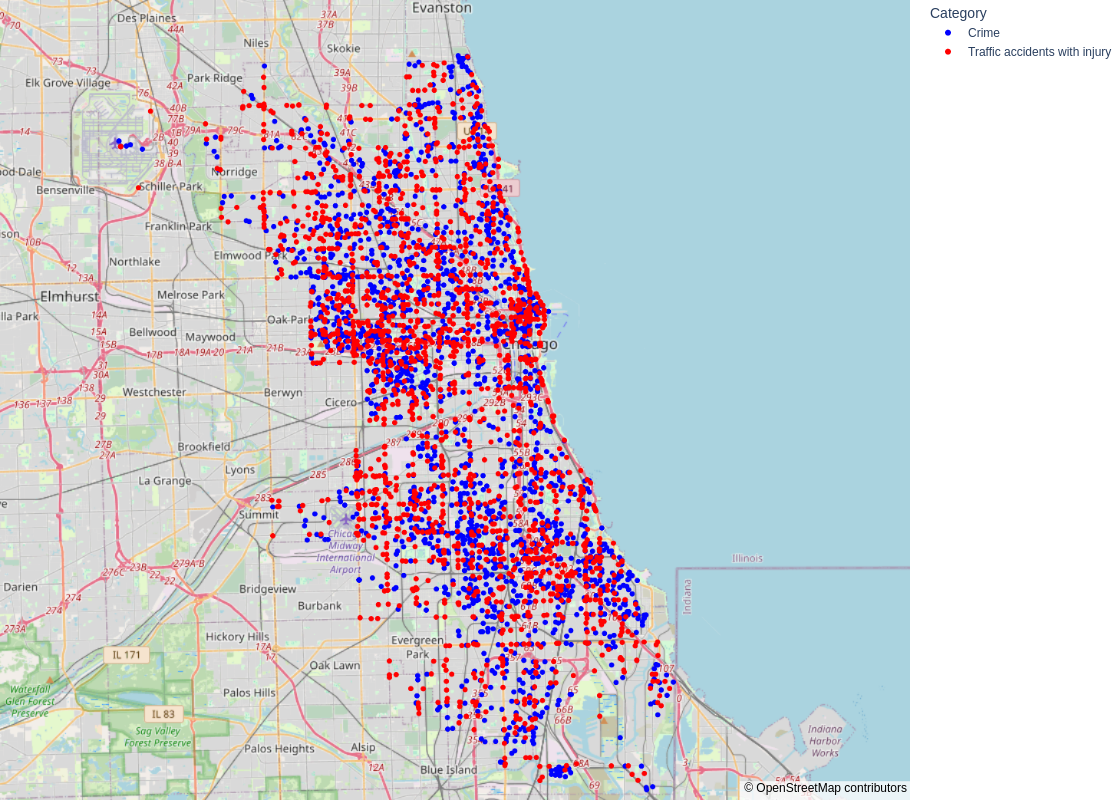

In [ ]:
df_crimes = crime_data
df_crashes = crash_data

df_crimes.dropna(subset=['Latitude', 'Longitude'], inplace=True)
df_crashes.dropna(subset=['LATITUDE', 'LONGITUDE'], inplace=True)

df_crashes = df_crashes[df_crashes['CRASH_TYPE'].str.contains('INJURY AND / OR TOW DUE TO CRASH', na=False)]

crime_count = df_crimes.shape[0]
crash_count = df_crashes.shape[0]

# Limit data to a smaller sample for performance
df_crimes = df_crimes.sample(n=2000, random_state=1)
df_crashes = df_crashes.sample(n=2000, random_state=1)

# Create a combined dataframe
df_combined = pd.DataFrame({
    'Latitude': pd.concat([df_crimes['Latitude'], df_crashes['LATITUDE']]),
    'Longitude': pd.concat([df_crimes['Longitude'], df_crashes['LONGITUDE']]),
    'Category': ['Crime'] * len(df_crimes) + ['Traffic accidents with injury'] * len(df_crashes)
})

# Define color scale
color_scale = {
    'Crime': 'blue',
    'Traffic accidents with injury': 'red'
}

# Plot the data
fig = px.scatter_mapbox(df_combined, 
                        lat="Latitude", 
                        lon="Longitude", 
                        color="Category",
                        color_discrete_map=color_scale,
                        zoom=10, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

The blue dots on the map of Chicago represent the places where a crime has occurred and the red dots are the places where a traffic accident occurred where someone got injured.

We wanted to visualize where all the crimes and traffic accidents with injuries happened since we suspect that those accidents are more often crime related. Therefore we wanted to plot the crimes on an interactive open street map if there is a correlation that is obvious for the eye.

From this visualization alone you can see that the dots on the map are most of the time clusters of dots and especially in the middle of the map you can see a horizontal line where almost no crime or traffic accidents happen. Since the dots are more clustered together, we can assume that there is some sort of correlation but what exactly is not expressively visible. 


In [ ]:
import pandas as pd
import plotly.express as px
import requests
import numpy as np

# Sample data and processing (already defined in your code)
# Assuming df_combined is already defined as per your provided code snippet

# URL to Chicago districts GeoJSON
geojson_url = 'https://raw.githubusercontent.com/blackmad/neighborhoods/master/chicago.geojson'

# Load GeoJSON data
response = requests.get(geojson_url)
geojson_data = response.json()

# Round latitude and longitude to the nearest 100 meters
df_combined['Rounded Latitude'] = df_combined['Latitude'].apply(lambda lat: round(lat, 2))  # rounding to 3 decimal places
df_combined['Rounded Longitude'] = df_combined['Longitude'].apply(lambda lon: round(lon, 2))  # rounding to 3 decimal places

# Aggregate incidents by rounded coordinates
incident_counts = df_combined.groupby(['Rounded Latitude', 'Rounded Longitude']).size().reset_index(name='Incident Count')

# Prepare data for heatmap plot
fig = px.density_mapbox(incident_counts, 
                        lat='Rounded Latitude', 
                        lon='Rounded Longitude', 
                        z='Incident Count',
                        radius=10,  # adjust radius as needed
                        center=dict(lat=np.mean(df_combined['Latitude']), lon=np.mean(df_combined['Longitude'])),
                        zoom=10,
                        mapbox_style="open-street-map",
                        height=800,
                        width=800)

# Add GeoJSON layer for Chicago districts
fig.update_layout(
    mapbox={
        'layers': [
            {
                'source': geojson_data,
                'type': "line",
                'color': "black",
                'opacity': 0.5
            }
        ]
    }
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Display the heatmap
fig.show()

In [ ]:
# Count occurrences of each beat in crash_data
crash_beat_counts = crash_data['BEAT_OF_OCCURRENCE'].value_counts().reset_index()
crash_beat_counts.columns = ['BEAT_OF_OCCURRENCE', 'Crash_Count']

# Count occurrences of each beat in crime_data
crime_beat_counts = crime_data['Beat'].value_counts().reset_index()
crime_beat_counts.columns = ['Beat', 'Crime_Count']

# Merge the counts on 'BEAT_OF_OCCURRENCE' or 'Beat'
merged_counts = pd.merge(crash_beat_counts, crime_beat_counts, left_on='BEAT_OF_OCCURRENCE', right_on='Beat', how='outer')

# Fill NaN values (if any) with 0, meaning there were no occurrences in either dataset
merged_counts.fillna(0, inplace=True)

# Sort the merged dataframe by 'Crash_Count' or any other criteria you need
merged_counts.sort_values(by='Crash_Count', ascending=False, inplace=True)

# Calculate correlation between 'Crash_Count' and 'Crime_Count'
correlation = merged_counts['Crash_Count'].corr(merged_counts['Crime_Count'])

# Display the sorted dataframe and correlation
print("Merged Counts:")
print(merged_counts)
print("\nCorrelation between Crash_Count and Crime_Count:", correlation)